In [6]:
%matplotlib inline
import numpy as np
import pdb
import matplotlib.pyplot as plt
import glob
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import copy
np.random.seed(0)

In [2]:
###### part (a) breast cancer dataset
wine = datasets.load_breast_cancer()
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=3)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')

train_acc: 96.12676056338029%, test_acc: 92.63157894736842%


[Text(279.0, 285.39000000000004, 'X[27] <= 0.142\ngini = 0.476\nsamples = 284\nvalue = [111, 173]'),
 Text(167.39999999999998, 203.85000000000002, 'X[22] <= 128.05\ngini = 0.142\nsamples = 182\nvalue = [14, 168]'),
 Text(111.6, 122.31, 'X[27] <= 0.111\ngini = 0.087\nsamples = 176\nvalue = [8, 168]'),
 Text(55.8, 40.76999999999998, 'gini = 0.013\nsamples = 151\nvalue = [1, 150]'),
 Text(167.39999999999998, 40.76999999999998, 'gini = 0.403\nsamples = 25\nvalue = [7, 18]'),
 Text(223.2, 122.31, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(390.59999999999997, 203.85000000000002, 'X[3] <= 354.7\ngini = 0.093\nsamples = 102\nvalue = [97, 5]'),
 Text(334.79999999999995, 122.31, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(446.4, 122.31, 'X[6] <= 0.088\ngini = 0.058\nsamples = 100\nvalue = [97, 3]'),
 Text(390.59999999999997, 40.76999999999998, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(502.2, 40.76999999999998, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]')]

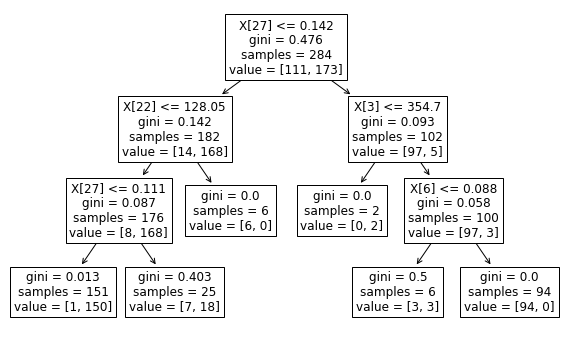

In [3]:
plt.figure(figsize=(10,6))
tree.plot_tree(clf, fontsize=12)

In [4]:
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train accuracy mean: 79.46830985915493%, stdev: 19.833084913624344%
test accuracy mean: 77.91929824561403%, stdev: 19.142739008718813%


In [5]:
###### part (b) ###########
wine = datasets.load_breast_cancer()
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=3)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train_acc: 97.65258215962442%, test_acc: 93.7062937062937%
train accuracy mean: 86.03051643192488%, stdev: 15.530878865320393%
test accuracy mean: 83.20979020979021%, stdev: 14.395574966294367%


In [7]:
###### part (c) ###########
wine = datasets.load_breast_cancer()
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, max_depth=3)
clf = clf.fit(X_train, Y_train)
# get test accuracy
#pdb.set_trace()
predict = clf.predict(X_train)
train_acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
predict = clf.predict(X_test)
val_acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
print(f'train_acc: {train_acc}%, test_acc: {val_acc}%')
# randomly alternate a split
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
non_leaf = np.where(children_left != -1)[0] # index of node that is not a leaf
all_features = np.arange(len(X_train[0])-1)+1
feature_range = []
for i in range(len(X_train[0])-1):
    minimum = min(X_train[:,i])
    maximum = max(X_train[:,i])
    feature_range.append([minimum,maximum])
test_acc = []
train_acc = []
for i in range(100):
    clf_cpy = copy.deepcopy(clf)
    # first select split node
    node = np.random.choice(non_leaf)
    sel_feature = np.random.choice(all_features)
    rand_range = feature_range[sel_feature-1]
    new_split = round(np.random.uniform(rand_range[0], rand_range[1]),2)
    # modify the tree
    clf_cpy.tree_.feature[node] = sel_feature
    clf_cpy.tree_.threshold[node] = new_split
    
    predict = clf_cpy.predict(X_train)
    acc = np.count_nonzero(predict==Y_train) / len(Y_train) * 100
    train_acc.append(acc)
    
    predict = clf_cpy.predict(X_test)
    acc = np.count_nonzero(predict==Y_test) / len(Y_test) * 100
    test_acc.append(acc)
train_mean = np.mean(train_acc) 
train_stdev = np.std(train_acc)
test_mean = np.mean(test_acc) 
test_stdev = np.std(test_acc)
print(f'train accuracy mean: {train_mean}%, stdev: {train_stdev}%')
print(f'test accuracy mean: {test_mean}%, stdev: {test_stdev}%')

train_acc: 97.65258215962442%, test_acc: 95.1048951048951%
train accuracy mean: 88.13380281690141%, stdev: 13.347599283064394%
test accuracy mean: 86.2937062937063%, stdev: 12.326352669009122%
